In [17]:
import pathlib
import os

CURRENT_FILE_LOCATION = pathlib.Path(os.getcwd())
PROCESSING_RESULTS_FOLDER = CURRENT_FILE_LOCATION / "ProcessedData"
DATASET_FILE1 = PROCESSING_RESULTS_FOLDER / "acidentes2021.csv"
DATASET_FILE2 = PROCESSING_RESULTS_FOLDER / "datatran2021.csv"
DATASET_FILE3 = PROCESSING_RESULTS_FOLDER / "acidentes2021_todas_causas_tipos.csv"

In [18]:
import pandas as pd
acidentesDf = pd.read_csv(DATASET_FILE2, delimiter=",", encoding="cp860")

In [19]:
import json
file = open("geojs-41-mun.json")
pr_geo = json.load(file)

In [20]:
import plotly.express as px
fig = px.scatter_mapbox(acidentesDf, lat="latitude", lon="longitude", hover_name="id")
fig.update_layout(
        mapbox={
            "style": "open-street-map"
        },
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
    )
fig.show()

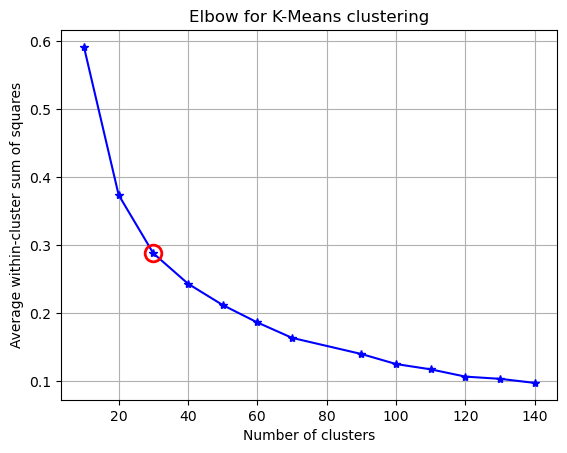

In [21]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

geo_data = acidentesDf[["latitude", "longitude"]].to_numpy()
X = geo_data
K = [10, 20, 30, 40, 50, 60, 70, 90, 100, 110, 120, 130, 140]

  # scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering') 

In [22]:

from sklearn.cluster import KMeans
geo_data = acidentesDf[["latitude", "longitude"]].to_numpy()
km = KMeans(30, init='k-means++') # initialize
km.fit(geo_data)
c = km.predict(geo_data) # classify into three clusters
c.shape

c:\Users\leonardo\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(19770,)

In [23]:
import plotly.express as px
import plotly.graph_objects as go

cluster_lat_long = np.concatenate((c.reshape(-1,1), geo_data), axis=1)

import pandas as pd 
pd.DataFrame(cluster_lat_long).to_csv("clustered.csv")
fig = go.Figure(go.Scattermapbox(mode="markers"))

for i in range(30):
    _filter = np.where(cluster_lat_long[:, 0] == i)[0]
    cluster = cluster_lat_long[_filter]

    fig.add_trace(go.Scattermapbox(lat=cluster[:, 1], lon=cluster[:, 2]))

fig.update_layout(
    mapbox={
        "style": "open-street-map"
    },
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)
fig.show()
    
    